In [ ]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.statespace.varmax import VARMAX
from statsmodels.tsa.api import VAR
from statsmodels.tsa.stattools import grangercausalitytests, adfuller
from tqdm import tqdm_notebook
from itertools import product

import matplotlib.pyplot as plt
import statsmodels.api as sm
import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings('ignore')

In [ ]:
data = pd.read_excel('/content/pune_tomato_market.xlsx')
data.head()

,Date,Arrival,Price
0,2010-01-03,70.4,1300.0
1,2010-01-04,70.4,1300.0
2,2010-01-05,70.4,1300.0
3,2010-01-06,70.4,1300.0
4,2010-01-07,70.4,1300.0


In [ ]:
data.set_index('Date', inplace=True)
data.head(1)

,Arrival,Price
Date,,
2010-01-03,70.4,1300.0


In [ ]:
macro_data = data[['Arrival','Price']]
print(macro_data.shape)

(5017, 2)


In [ ]:
ad_fuller_result_1 = adfuller(macro_data['Arrival'].diff()[1:])

print('Arrivals')
print(f'ADF Statistic: {ad_fuller_result_1[0]}')
print(f'p-value: {ad_fuller_result_1[1]}')

print('\n---------------------\n')

ad_fuller_result_2 = adfuller(macro_data['Price'].diff()[1:])

print('Price')
print(f'ADF Statistic: {ad_fuller_result_2[0]}')
print(f'p-value: {ad_fuller_result_2[1]}')

Arrivals
ADF Statistic: -21.507423149338475
p-value: 0.0

---------------------

Price
ADF Statistic: -12.073765765571508
p-value: 2.3154376538953218e-22


In [ ]:
print('Price causes Arrivals?\n')
print('------------------')
granger_1 = grangercausalitytests(macro_data[['Arrival', 'Price']], 3)

print('\nArrivals causes Price?\n')
print('------------------')
granger_2 = grangercausalitytests(macro_data[['Price', 'Arrival']], 3)

Price causes Arrivals?

------------------

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=26.3507 , p=0.0000  , df_denom=5013, df_num=1
ssr based chi2 test:   chi2=26.3664 , p=0.0000  , df=1
likelihood ratio test: chi2=26.2974 , p=0.0000  , df=1
parameter F test:         F=26.3507 , p=0.0000  , df_denom=5013, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=9.0672  , p=0.0001  , df_denom=5010, df_num=2
ssr based chi2 test:   chi2=18.1526 , p=0.0001  , df=2
likelihood ratio test: chi2=18.1198 , p=0.0001  , df=2
parameter F test:         F=9.0672  , p=0.0001  , df_denom=5010, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=5.3104  , p=0.0012  , df_denom=5007, df_num=3
ssr based chi2 test:   chi2=15.9534 , p=0.0012  , df=3
likelihood ratio test: chi2=15.9281 , p=0.0012  , df=3
parameter F test:         F=5.3104  , p=0.0012  , df_denom=5007, df_num=3

Arrivals causes Price?

------------------



In [ ]:
train_df=macro_data[:-1000]
test_df=macro_data[-1000:]

In [ ]:
model = VAR(train_df.diff()[1:])

In [ ]:
sorted_order=model.select_order(maxlags=20)
print(sorted_order.summary())

 VAR Order Selection (* highlights the minimums)  
       AIC         BIC         FPE         HQIC   
--------------------------------------------------
0        20.63       20.63   9.126e+08       20.63
1        20.27       20.28   6.383e+08       20.28
2        20.19       20.21   5.887e+08       20.20
3        20.15       20.17   5.615e+08       20.15
4        20.10       20.13   5.388e+08       20.11
5        20.05       20.08   5.096e+08       20.06
6        19.93       19.97   4.533e+08       19.95
7        19.93       19.98   4.525e+08       19.95
8        19.93       19.99   4.530e+08       19.95
9        19.93       19.99   4.522e+08       19.95
10       19.93       20.00   4.525e+08       19.95
11       19.93       20.00   4.529e+08       19.96
12       19.93       20.01   4.528e+08       19.96
13       19.88      19.97*   4.324e+08       19.91
14       19.88       19.98   4.321e+08       19.92
15       19.89       19.98   4.327e+08       19.92
16       19.89       19.99   4.

In [ ]:
var_model = VARMAX(train_df, order=(20,0),enforce_stationarity= True)
fitted_model = var_model.fit(disp=False)
print(fitted_model.summary())

                            Statespace Model Results                            
Dep. Variable:     ['Arrival', 'Price']   No. Observations:                 4017
Model:                          VAR(20)   Log Likelihood              -51182.665
                            + intercept   AIC                         102535.331
Date:                  Fri, 29 Nov 2024   BIC                         103070.685
Time:                          16:09:39   HQIC                        102725.059
Sample:                      01-03-2010                                         
                           - 01-01-2021                                         
Covariance Type:                    opg                                         
Ljung-Box (L1) (Q):             0.01, 0.00   Jarque-Bera (JB):   1973744.90, 74782.73
Prob(Q):                        0.92, 0.99   Prob(JB):                     0.00, 0.00
Heteroskedasticity (H):         0.27, 2.92   Skew:                         7.37, 1.62
Prob(H) (two-

In [ ]:
n_forecast = 1000
predict = fitted_model.get_prediction(start=len(train_df),end=len(train_df) + n_forecast-1)

predictions=predict.predicted_mean

In [ ]:
predictions

,Arrival,Price
2021-01-02,181.843239,903.742490
2021-01-03,211.340162,877.333615
2021-01-04,157.349855,898.092563
2021-01-05,156.677148,873.041008
2021-01-06,146.122253,866.828934
...,...,...
2023-09-24,153.591119,1074.193768
2023-09-25,153.591119,1074.193768
2023-09-26,153.591119,1074.193768
2023-09-27,153.591119,1074.193768


In [ ]:
predictions.columns=['Arrivals_predicted','Price_predicted']
predictions

,Arrivals_predicted,Price_predicted
2021-01-02,181.843239,903.742490
2021-01-03,211.340162,877.333615
2021-01-04,157.349855,898.092563
2021-01-05,156.677148,873.041008
2021-01-06,146.122253,866.828934
...,...,...
2023-09-24,153.591119,1074.193768
2023-09-25,153.591119,1074.193768
2023-09-26,153.591119,1074.193768
2023-09-27,153.591119,1074.193768


In [ ]:
test_vs_pred=pd.concat([test_df,predictions],axis=1)

In [ ]:
test_vs_pred = test_vs_pred.reset_index()

In [ ]:
test_vs_pred_1 = test_vs_pred[:1000][['index','Arrival','Price']].copy()
test_vs_pred_1

,index,Arrival,Price
0,2021-01-02,177.0,1070.0
1,2021-01-03,353.0,650.0
2,2021-01-04,123.0,750.0
3,2021-01-05,174.0,750.0
4,2021-01-06,91.0,650.0
...,...,...,...
995,2023-09-24,235.0,700.0
996,2023-09-25,223.0,700.0
997,2023-09-26,246.0,600.0
998,2023-09-27,166.0,550.0


In [ ]:
test_vs_pred_2 = test_vs_pred[:1000][['Arrivals_predicted','Price_predicted']].copy()
test_vs_pred_2.index = range(len(test_vs_pred_2)) # Reset the index to start from 0
test_vs_pred_2

,Arrivals_predicted,Price_predicted
0,181.843239,903.742490
1,211.340162,877.333615
2,157.349855,898.092563
3,156.677148,873.041008
4,146.122253,866.828934
...,...,...
995,153.591119,1074.193768
996,153.591119,1074.193768
997,153.591119,1074.193768
998,153.591119,1074.193768


In [ ]:

test_vs_pred_combined = pd.concat([test_vs_pred_1, test_vs_pred_2], axis=1)
test_vs_pred_combined

,index,Arrival,Price,Arrivals_predicted,Price_predicted
0,2021-01-02,177.0,1070.0,181.843239,903.742490
1,2021-01-03,353.0,650.0,211.340162,877.333615
2,2021-01-04,123.0,750.0,157.349855,898.092563
3,2021-01-05,174.0,750.0,156.677148,873.041008
4,2021-01-06,91.0,650.0,146.122253,866.828934
...,...,...,...,...,...
995,2023-09-24,235.0,700.0,153.591119,1074.193768
996,2023-09-25,223.0,700.0,153.591119,1074.193768
997,2023-09-26,246.0,600.0,153.591119,1074.193768
998,2023-09-27,166.0,550.0,153.591119,1074.193768


In [ ]:
test_vs_pred_combined.set_index('index',inplace=True)

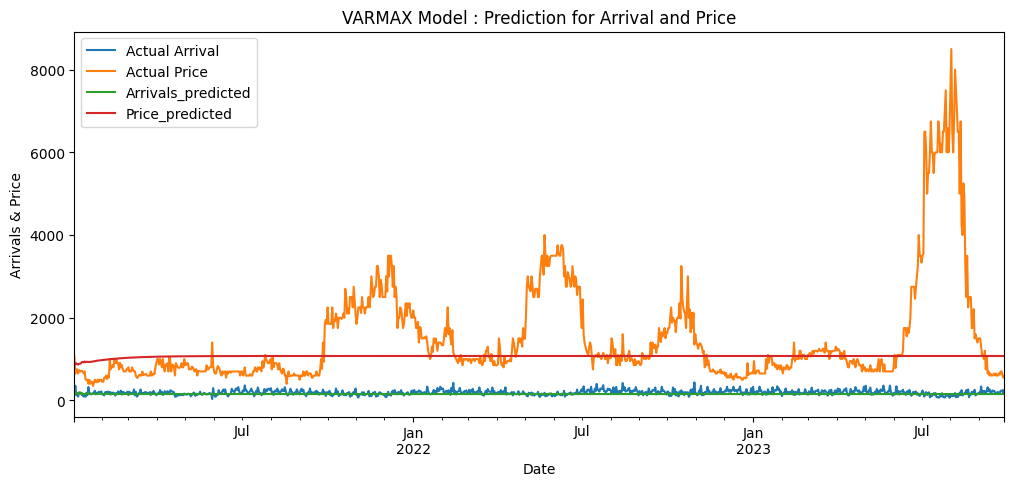

In [ ]:
import matplotlib.pyplot as plt

test_vs_pred_combined.plot(figsize=(12,5))
plt.xlabel("Date")
plt.ylabel("Arrivals & Price")
plt.title("VARMAX Model : Prediction for Arrival and Price")
new_legend_labels = ['Actual Arrival', 'Actual Price'] + list(test_vs_pred_combined.columns[2:])  # Keeping the rest unchanged
plt.legend(labels=new_legend_labels)
plt.show()

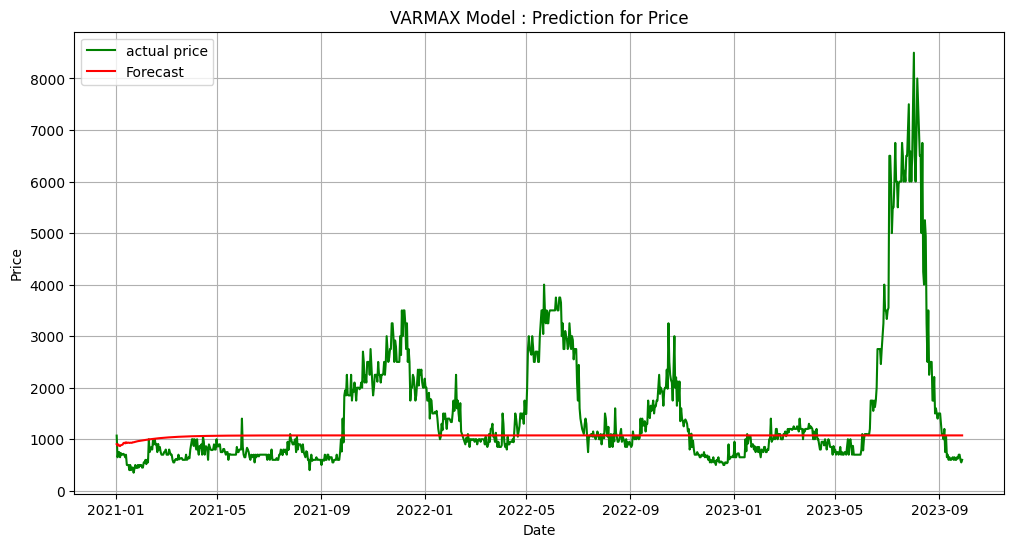

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(predictions.index, test_df['Price'], label='actual price', color='green')
plt.plot(predictions.index, predictions['Price_predicted'], label='Forecast', color='red')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.title('VARMAX Model : Prediction for Price')
plt.grid(True)
plt.show()

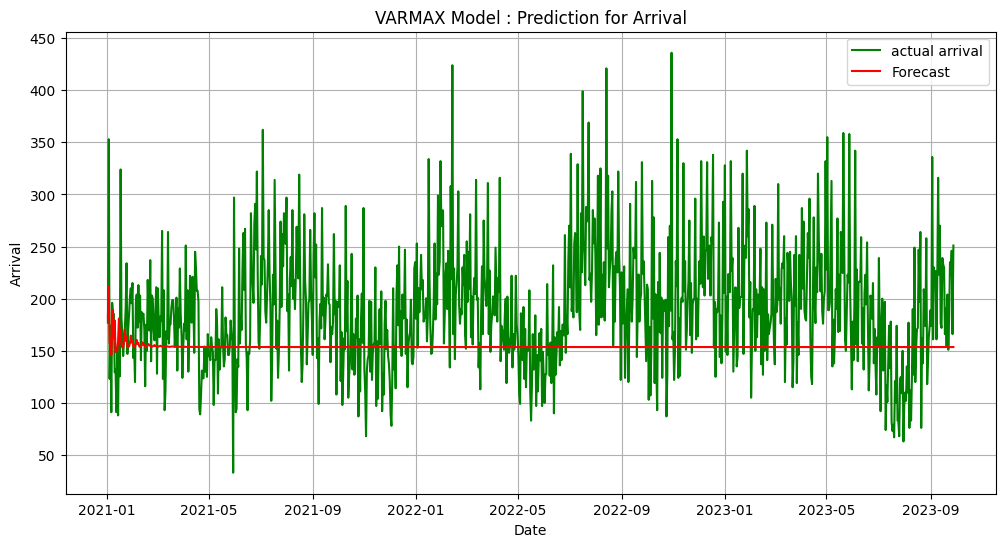

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(predictions.index, test_df['Arrival'], label='actual arrival', color='green')
plt.plot(predictions.index, predictions['Arrivals_predicted'], label='Forecast', color='red')
plt.xlabel('Date')
plt.ylabel('Arrival')
plt.legend()
plt.title('VARMAX Model : Prediction for Arrival')
plt.grid(True)
plt.show()

In [ ]:
from sklearn.metrics import mean_squared_error
import math
from statistics import mean

rmse_Arrivals=math.sqrt(mean_squared_error(predictions['Arrivals_predicted'],test_df['Arrival']))
print('Mean value of Arrivals is : {}. Root Mean Squared Error is :{}'.format(mean(test_df['Arrival']),rmse_Arrivals))

rmse_Price=math.sqrt(mean_squared_error(predictions['Price_predicted'],test_df['Price']))
print('Mean value of Price is : {}. Root Mean Squared Error is :{}'.format(mean(test_df['Price']),rmse_Price))

Mean value of Arrivals is : 190.77865555555553. Root Mean Squared Error is :67.86165816672612
Mean value of Price is : 1504.3844444444444. Root Mean Squared Error is :1352.8682822286135


In [ ]:
#Price
from sklearn.metrics import mean_squared_error
y_true = test_df["Price"]
y_pred = predictions['Price_predicted']

mse = mean_squared_error(y_true, y_pred)
rmse = np.sqrt(mse)

# Calculate the range of the target variable
y_range = np.max(y_true) - np.min(y_true)

# Calculate the RMSE as a percentage of the range
rmse_percentage = (rmse / y_range) * 100

# Calculate NRMSE (normalized by mean of observed values)
nrmse = rmse / np.mean(y_true)
print(f'Normalized RMSE (NRMSE): {nrmse:.2f}')

print(f'Root Mean Squared Error (MSE) : {mse:.2f}')
print(f'Root Mean Squared Error (RMSE) : {rmse:.2f}')
print(f'Root Mean Squared Error (RMSE) as a percentage of the range: {rmse_percentage:.2f}%')

Normalized RMSE (NRMSE): 0.90
Root Mean Squared Error (MSE) : 1830252.59
Root Mean Squared Error (RMSE) : 1352.87
Root Mean Squared Error (RMSE) as a percentage of the range: 16.60%


In [ ]:
#Arrival
from sklearn.metrics import mean_squared_error
y_true = test_df["Arrival"]
y_pred = predictions['Arrivals_predicted']

mse = mean_squared_error(y_true, y_pred)
rmse = np.sqrt(mse)

# Calculate the range of the target variable
y_range = np.max(y_true) - np.min(y_true)

# Calculate the RMSE as a percentage of the range
rmse_percentage = (rmse / y_range) * 100

# Calculate NRMSE (normalized by mean of observed values)
nrmse = rmse / np.mean(y_true)
print(f'Normalized RMSE (NRMSE): {nrmse:.2f}')

print(f'Root Mean Squared Error (MSE) : {mse:.2f}')
print(f'Root Mean Squared Error (RMSE) : {rmse:.2f}')
print(f'Root Mean Squared Error (RMSE) as a percentage of the range: {rmse_percentage:.2f}%')

Normalized RMSE (NRMSE): 0.36
Root Mean Squared Error (MSE) : 4605.20
Root Mean Squared Error (RMSE) : 67.86
Root Mean Squared Error (RMSE) as a percentage of the range: 16.84%
